#Utopia Assignment

In [8]:
library(Amelia)
library(mlbench)
library(dplyr)
library(chron)
library(readr)

In [9]:
consumption_data <- read_csv("consumption_data.csv")



-- Column specification ------------------------------------------------------------------------------------------------
cols(
  Stamp = col_character(),
  Track = col_character(),
  Artist = col_character(),
  Feed_Id = col_character(),
  Feed_Name = col_character()
)




In [11]:
head(consumption_data)

Stamp,Track,Artist,Feed_Id,Feed_Name
<chr>,<chr>,<chr>,<chr>,<chr>
2019-06-07 18:38:00 +0000 UTC,Song_02,artist_08,feed_id_1377,feed_name_1183
2019-06-08 09:04:00 +0000 UTC,Song_02,artist_08,feed_id_1377,feed_name_1183
2019-06-08 19:51:00 +0000 UTC,Song_02,artist_08,feed_id_1377,feed_name_1183
2019-06-09 20:52:00 +0000 UTC,Song_02,artist_08,feed_id_1377,feed_name_1183
2019-06-10 11:06:00 +0000 UTC,Song_02,artist_08,feed_id_1377,feed_name_1183
2019-06-14 07:09:00 +0000 UTC,Song_02,artist_08,feed_id_1377,feed_name_1183


#Our dataset is loaded as 'consumption_data' with 521974 observations

In [13]:
#Hovering summary details
summary(consumption_data)


    Stamp              Track              Artist            Feed_Id         
 Length:521974      Length:521974      Length:521974      Length:521974     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
  Feed_Name        
 Length:521974     
 Class :character  
 Mode  :character  

In [14]:
str(consumption_data)


spec_tbl_df [521,974 x 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Stamp    : chr [1:521974] "2019-06-07 18:38:00 +0000 UTC" "2019-06-08 09:04:00 +0000 UTC" "2019-06-08 19:51:00 +0000 UTC" "2019-06-09 20:52:00 +0000 UTC" ...
 $ Track    : chr [1:521974] "Song_02" "Song_02" "Song_02" "Song_02" ...
 $ Artist   : chr [1:521974] "artist_08" "artist_08" "artist_08" "artist_08" ...
 $ Feed_Id  : chr [1:521974] "feed_id_1377" "feed_id_1377" "feed_id_1377" "feed_id_1377" ...
 $ Feed_Name: chr [1:521974] "feed_name_1183" "feed_name_1183" "feed_name_1183" "feed_name_1183" ...
 - attr(*, "spec")=
  .. cols(
  ..   Stamp = col_character(),
  ..   Track = col_character(),
  ..   Artist = col_character(),
  ..   Feed_Id = col_character(),
  ..   Feed_Name = col_character()
  .. )


In [15]:

#check for missing data
missing(consumption_data)


[1] FALSE

Warning message:
"Unknown or uninitialised column: `arguments`."
Warning message:
"Unknown or uninitialised column: `arguments`."
Warning message:
"Unknown or uninitialised column: `imputations`."


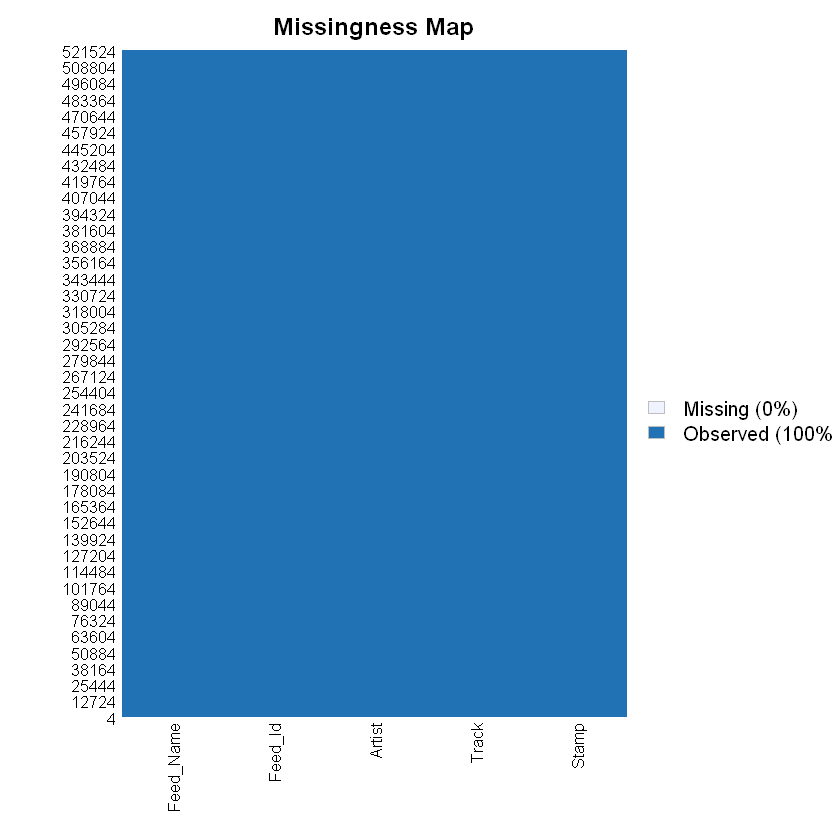

In [16]:
missmap(consumption_data) ##no missing data

In [21]:
#Remove duplicates (on all columns)
consumption_nodup <- consumption_data %>% distinct()


In [22]:
#Now, 'consumption_nodup' is our new dataset with no duplicate data with 517065 observations
head(consumption_nodup)

Stamp,Track,Artist,Feed_Id,Feed_Name
<chr>,<chr>,<chr>,<chr>,<chr>
2019-06-07 18:38:00 +0000 UTC,Song_02,artist_08,feed_id_1377,feed_name_1183
2019-06-08 09:04:00 +0000 UTC,Song_02,artist_08,feed_id_1377,feed_name_1183
2019-06-08 19:51:00 +0000 UTC,Song_02,artist_08,feed_id_1377,feed_name_1183
2019-06-09 20:52:00 +0000 UTC,Song_02,artist_08,feed_id_1377,feed_name_1183
2019-06-10 11:06:00 +0000 UTC,Song_02,artist_08,feed_id_1377,feed_name_1183
2019-06-14 07:09:00 +0000 UTC,Song_02,artist_08,feed_id_1377,feed_name_1183


### Formatting date time stamp

In [24]:
#remove " +0000 UTC" 
consumption_nodup$Stamp = substr(consumption_nodup$Stamp,1,19)
head(consumption_nodup)

Stamp,Track,Artist,Feed_Id,Feed_Name
<chr>,<chr>,<chr>,<chr>,<chr>
2019-06-07 18:38:00,Song_02,artist_08,feed_id_1377,feed_name_1183
2019-06-08 09:04:00,Song_02,artist_08,feed_id_1377,feed_name_1183
2019-06-08 19:51:00,Song_02,artist_08,feed_id_1377,feed_name_1183
2019-06-09 20:52:00,Song_02,artist_08,feed_id_1377,feed_name_1183
2019-06-10 11:06:00,Song_02,artist_08,feed_id_1377,feed_name_1183
2019-06-14 07:09:00,Song_02,artist_08,feed_id_1377,feed_name_1183


Format the date to type "%Y-%m-%d %H:%M:%S"

In [ ]:

consumption_nodup$Stamp <- as.POSIXct(consumption_nodup$Stamp, format="%Y-%m-%d %H:%M:%S")


#### creating Date and Time variables separately


In [26]:
Date <- as.Date(consumption_nodup$Stamp, tz= 'CET')
head(Date)

[1] "2019-06-07" "2019-06-08" "2019-06-08" "2019-06-09" "2019-06-10"
[6] "2019-06-14"

# Time is not formating the way its expected to. Not adding to the dataframe.

In [31]:
Time <- format(consumption_nodup$Stamp, format = "%H:%M:%S")
#Time <- chron(times=Time)
head(Time)


[1] "2019-06-07 18:38:00" "2019-06-08 09:04:00" "2019-06-08 19:51:00"
[4] "2019-06-09 20:52:00" "2019-06-10 11:06:00" "2019-06-14 07:09:00"

In [32]:
consumption_nodup$Date <- Date
head(consumption_nodup)

Stamp,Track,Artist,Feed_Id,Feed_Name,Date
<chr>,<chr>,<chr>,<chr>,<chr>,<date>
2019-06-07 18:38:00,Song_02,artist_08,feed_id_1377,feed_name_1183,2019-06-07
2019-06-08 09:04:00,Song_02,artist_08,feed_id_1377,feed_name_1183,2019-06-08
2019-06-08 19:51:00,Song_02,artist_08,feed_id_1377,feed_name_1183,2019-06-08
2019-06-09 20:52:00,Song_02,artist_08,feed_id_1377,feed_name_1183,2019-06-09
2019-06-10 11:06:00,Song_02,artist_08,feed_id_1377,feed_name_1183,2019-06-10
2019-06-14 07:09:00,Song_02,artist_08,feed_id_1377,feed_name_1183,2019-06-14


#### Consolidation and analysis

In [34]:
##Trackwise
FreqTrack <- consumption_nodup %>% count(Track, Feed_Id)
head(FreqTrack)


Track,Feed_Id,n
<chr>,<chr>,<int>
Song_01,feed_id_02,68
Song_01,feed_id_08,2
Song_01,feed_id_10,1
Song_01,feed_id_100,4
Song_01,feed_id_1008,365
Song_01,feed_id_1010,3


In [35]:
##Artistwise
FreqArtist <- consumption_nodup %>% count(Artist, Feed_Id)
head(FreqArtist)


Artist,Feed_Id,n
<chr>,<chr>,<int>
artist_01,feed_id_08,2
artist_01,feed_id_1006,7
artist_01,feed_id_1008,392
artist_01,feed_id_102,14
artist_01,feed_id_1023,12
artist_01,feed_id_103,10


In [36]:
##Most played track datewise
DateTrack <- consumption_nodup %>% count(Date, Track)
head(DateTrack)


Date,Track,n
<date>,<chr>,<int>
2019-01-01,Song_01,86
2019-01-01,Song_02,59
2019-01-01,Song_03,9
2019-01-01,Song_04,343
2019-01-01,Song_05,288
2019-01-01,Song_06,54


In [37]:
##Most played track datewise
DateTrack <- consumption_nodup %>% count(Date, Track)
head(DateTrack)


Date,Track,n
<date>,<chr>,<int>
2019-01-01,Song_01,86
2019-01-01,Song_02,59
2019-01-01,Song_03,9
2019-01-01,Song_04,343
2019-01-01,Song_05,288
2019-01-01,Song_06,54


In [38]:
##Most played artist datewise
DateArtist <- consumption_nodup %>% count(Date, Artist)
head(DateArtist)

Date,Artist,n
<date>,<chr>,<int>
2019-01-01,artist_01,51
2019-01-01,artist_02,86
2019-01-01,artist_03,288
2019-01-01,artist_04,10
2019-01-01,artist_05,54
2019-01-01,artist_06,9


## Feed and station mapping data

In [40]:
feed_station_mapping <- read_csv("feed_station_mapping.csv")


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  Feed_Id = col_character(),
  SMP_Station = col_character()
)




In [44]:
SMPtable <- table(consumption_nodup$Feed_Id)
head(SMPtable) ##more number of unique feed IDs in consumption dataset (1479) than station dataset (1125)


feed_id_01 feed_id_02 feed_id_03 feed_id_04 feed_id_05 feed_id_06 
       127        122        208         18          2        521 

#### Duplicates and missing values in Station dataset

In [46]:

feed_station_nodup <- feed_station_mapping %>% distinct() ##no duplicates in the data
head(feed_station_nodup)


Feed_Id,SMP_Station
<chr>,<chr>
feed_id_01,smp_station_name_1027
feed_id_02,smp_station_name_94
feed_id_03,smp_station_name_500
feed_id_04,smp_station_name_346
feed_id_06,smp_station_name_732
feed_id_08,smp_station_name_639


In [47]:
count(feed_station_mapping %>% distinct(SMP_Station)) ##1122


n
<int>
1122


In [48]:
count(feed_station_mapping %>% distinct(Feed_Id)) ##1125


n
<int>
1125


In [49]:
feed_station_mapping %>% group_by(SMP_Station) %>% filter(n()>1) ##to check the one to many relationship


Feed_Id,SMP_Station
<chr>,<chr>
feed_id_1347,smp_station_name_154
feed_id_204,smp_station_name_1068
feed_id_396,smp_station_name_1068
feed_id_405,smp_station_name_722
feed_id_557,smp_station_name_722
feed_id_736,smp_station_name_154


In [50]:
missing(feed_station_nodup)


[1] FALSE

Warning message:
"Unknown or uninitialised column: `arguments`."
Warning message:
"Unknown or uninitialised column: `arguments`."
Warning message:
"Unknown or uninitialised column: `imputations`."


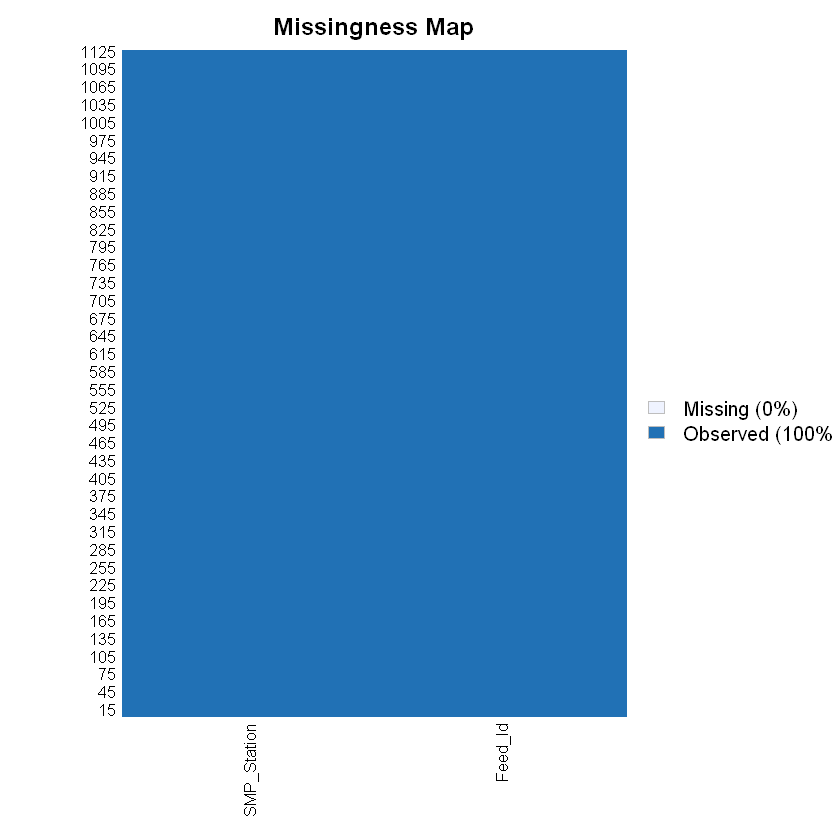

In [51]:
missmap(feed_station_nodup) ##no missing data

#### Joining the 2 tables through Left join


In [52]:
mergedata = merge(x= consumption_nodup, y=feed_station_nodup, by="Feed_Id", all.x=TRUE)
head(mergedata)

,Feed_Id,Stamp,Track,Artist,Feed_Name,Date,SMP_Station
,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>
1,feed_id_01,2019-01-24 15:09:00,Song_05,artist_03,feed_name_572,2019-01-24,smp_station_name_1027
2,feed_id_01,2019-02-01 18:10:00,Song_05,artist_03,feed_name_572,2019-02-01,smp_station_name_1027
3,feed_id_01,2019-02-02 10:02:00,Song_05,artist_03,feed_name_572,2019-02-02,smp_station_name_1027
4,feed_id_01,2019-01-28 14:34:00,Song_05,artist_03,feed_name_572,2019-01-28,smp_station_name_1027
5,feed_id_01,2019-01-29 08:57:00,Song_05,artist_03,feed_name_572,2019-01-29,smp_station_name_1027
6,feed_id_01,2019-02-07 13:06:00,Song_05,artist_03,feed_name_572,2019-02-07,smp_station_name_1027


 #### The missing SMP station values in the merged data

In [53]:
head(mergedata %>% filter(is.na(mergedata$SMP_Station)))

,Feed_Id,Stamp,Track,Artist,Feed_Name,Date,SMP_Station
,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>
1,feed_id_05,2020-03-15 08:23:05,Song_04,artist_07,feed_name_1306,2020-03-15,NA
2,feed_id_05,2020-06-11 15:41:42,Song_04,artist_07,feed_name_1306,2020-06-11,NA
3,feed_id_07,2019-01-31 14:41:01,Song_05,artist_03,feed_name_31,2019-01-31,NA
4,feed_id_07,2019-02-01 11:28:39,Song_05,artist_03,feed_name_31,2019-02-01,NA
5,feed_id_07,2019-02-02 06:09:33,Song_05,artist_03,feed_name_31,2019-02-02,NA
6,feed_id_07,2019-02-02 16:45:28,Song_05,artist_03,feed_name_31,2019-02-02,NA


##### Recoding missing values of SMP Station variable


In [54]:
mergedata$SMP_Station <- ifelse(is.na(mergedata$SMP_Station),
                                mergedata$Feed_Name, mergedata$SMP_Station)

In [56]:
mergedata %>% filter(Stamp == '2020-03-15 08:23:05') # now staion column is replace with Feed_Name columns value.

Feed_Id,Stamp,Track,Artist,Feed_Name,Date,SMP_Station
<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>
feed_id_05,2020-03-15 08:23:05,Song_04,artist_07,feed_name_1306,2020-03-15,feed_name_1306
feed_id_1274,2020-03-15 08:23:05,Song_04,artist_07,feed_name_1368,2020-03-15,feed_name_1368
feed_id_1361,2020-03-15 08:23:05,Song_04,artist_07,feed_name_1368,2020-03-15,feed_name_1368


## DOUBLE COUNT PLAY
#### same timestamp
#### same track
#### same (I) / different (II) feed ID
#### same station

(I) such duplicates have already been removed in the initial stage
(II) such duplicates are removed below

In [57]:
### filtering out the 'good' data, that is data unique on combination of variables- feed ID, track, stamp and station
gooddata <- mergedata %>% group_by(Track, Stamp, SMP_Station) %>% filter(n()==1)
lengths(gooddata) #515910 observations

Feed_Id       Stamp       Track      Artist   Feed_Name        Date 
     515910      515910      515910      515910      515910      515910 
SMP_Station 
     515910

In [58]:
###filtering out the 'bad' data, that is data duplicated on combination of variables- Stamp, station and track, but differing on Feed ID
baddata <- mergedata %>% group_by(Track, Stamp, SMP_Station) %>% filter(n()>1)


In [60]:
head(baddata[order(baddata$Stamp),]) #1165 observations

Feed_Id,Stamp,Track,Artist,Feed_Name,Date,SMP_Station
<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>
feed_id_1454,2019-01-02 21:10:50,Song_05,artist_03,feed_name_202,2019-01-02,feed_name_202
feed_id_504,2019-01-02 21:10:50,Song_05,artist_03,feed_name_202,2019-01-02,feed_name_202
feed_id_136,2019-01-03 20:58:02,Song_04,artist_07,feed_name_571,2019-01-03,feed_name_571
feed_id_680,2019-01-03 20:58:02,Song_04,artist_07,feed_name_571,2019-01-03,feed_name_571
feed_id_78,2019-01-03 20:58:02,Song_04,artist_07,feed_name_571,2019-01-03,feed_name_571
feed_id_879,2019-01-03 20:58:02,Song_04,artist_07,feed_name_571,2019-01-03,feed_name_571


In [61]:
###now, retaining one of the records from the duplicated 'bad' data groups from above using Stamp
gooddata2 <- baddata %>% distinct(Stamp, .keep_all=TRUE)


In [63]:
head(gooddata2[order(gooddata2$Feed_Id, gooddata2$SMP_Station),]) #546 observations

Feed_Id,Stamp,Track,Artist,Feed_Name,Date,SMP_Station
<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>
feed_id_1022,2020-08-06 10:26:05,Song_05,artist_03,feed_name_700,2020-08-06,feed_name_700
feed_id_1022,2020-08-15 04:16:10,Song_05,artist_03,feed_name_700,2020-08-15,feed_name_700
feed_id_1022,2020-09-01 11:42:36,Song_05,artist_03,feed_name_700,2020-09-01,feed_name_700
feed_id_1022,2020-09-06 14:31:42,Song_05,artist_03,feed_name_700,2020-09-06,feed_name_700
feed_id_1054,2019-01-26 15:14:23,Song_05,artist_03,feed_name_209,2019-01-26,feed_name_209
feed_id_1054,2019-02-14 20:41:25,Song_05,artist_03,feed_name_209,2019-02-14,feed_name_209


In [64]:
###Now merging all the good data
finaldata <- rbind(gooddata, gooddata2)


In [65]:
head(finaldata) #516446 observations


Feed_Id,Stamp,Track,Artist,Feed_Name,Date,SMP_Station
<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>
feed_id_01,2019-01-24 15:09:00,Song_05,artist_03,feed_name_572,2019-01-24,smp_station_name_1027
feed_id_01,2019-02-01 18:10:00,Song_05,artist_03,feed_name_572,2019-02-01,smp_station_name_1027
feed_id_01,2019-02-02 10:02:00,Song_05,artist_03,feed_name_572,2019-02-02,smp_station_name_1027
feed_id_01,2019-01-28 14:34:00,Song_05,artist_03,feed_name_572,2019-01-28,smp_station_name_1027
feed_id_01,2019-01-29 08:57:00,Song_05,artist_03,feed_name_572,2019-01-29,smp_station_name_1027
feed_id_01,2019-02-07 13:06:00,Song_05,artist_03,feed_name_572,2019-02-07,smp_station_name_1027


In [66]:
str(finaldata)

grouped_df [516,451 x 7] (S3: grouped_df/tbl_df/tbl/data.frame)
 $ Feed_Id    : chr [1:516451] "feed_id_01" "feed_id_01" "feed_id_01" "feed_id_01" ...
 $ Stamp      : chr [1:516451] "2019-01-24 15:09:00" "2019-02-01 18:10:00" "2019-02-02 10:02:00" "2019-01-28 14:34:00" ...
 $ Track      : chr [1:516451] "Song_05" "Song_05" "Song_05" "Song_05" ...
 $ Artist     : chr [1:516451] "artist_03" "artist_03" "artist_03" "artist_03" ...
 $ Feed_Name  : chr [1:516451] "feed_name_572" "feed_name_572" "feed_name_572" "feed_name_572" ...
 $ Date       : Date[1:516451], format: "2019-01-24" "2019-02-01" ...
 $ SMP_Station: chr [1:516451] "smp_station_name_1027" "smp_station_name_1027" "smp_station_name_1027" "smp_station_name_1027" ...
 - attr(*, "groups")= tibble [516,451 x 4] (S3: tbl_df/tbl/data.frame)
  ..$ Track      : chr [1:516451] "Song_01" "Song_01" "Song_01" "Song_01" ...
  ..$ Stamp      : chr [1:516451] "2019-01-01 00:03:00" "2019-01-01 00:19:00" "2019-01-01 00:48:00" "2019-01-01 01:29:0

In [67]:
##deleting 39 records as their Stamp returns Null due to format mismatch
table(is.na(finaldata$Stamp))



 FALSE 
516451 

In [68]:
finaldata_filtered <- finaldata %>% filter(!is.na(Stamp))


In [69]:
table(is.na(finaldata_filtered$Stamp)) ##516407 observations


 FALSE 
516451 

In [70]:
##export cleaned data for visualization in Tableau
write.csv(finaldata_filtered, "Radiofeed_cleandata.csv", row.names=FALSE)



In [71]:
##Further analysis using visualization in Tableau